### 📜 Sobre o Conjunto de Dados

O **Conjunto de Dados de Tendências de Compras** oferece uma visão abrangente sobre os comportamentos dos consumidores no setor de varejo.

Abrangendo diversos elementos transacionais, demográficos e comportamentais, este conjunto de dados é uma fonte valiosa para compreender as preferências de compras dos clientes e aplicar estratégias de varejo baseadas em dados.

#### **Colunas do Conjunto de Dados**
* Customer ID = Número de identificação exclusivo que identifica o cliente.
* Age = Idade do cliente.
* Gender = Gênero do cliente (feminino, masculino, etc.).
* Item Purchased = Nome do produto comprado pelo cliente.
* Category = Categoria à qual o produto pertence (ex.: vestuário, eletrônicos).
* Purchase Amount (USD) = Valor total da compra do cliente (em dólares americanos).
* Location = Região geográfica ou cidade onde o cliente está localizado.
* Size = Tamanho do produto comprado (ex.: P, M, G, GG).
* Color = Cor do produto comprado.
* Season = Estação em que a compra foi realizada (ex.: verão, inverno).
* Review Rating = Classificação dada pelo cliente ao produto (geralmente de 1 a 5).
* Subscription Status = Status de assinatura do cliente.
* Payment Method = Método usado pelo cliente para o pagamento (ex.: cartão de crédito, PayPal).
* Shipping Type = Método de envio do produto (ex.: envio padrão, envio expresso).
* Discount Applied = Taxa de desconto aplicada durante a compra.
* Promo Code Used = Código promocional usado pelo cliente durante a compra.
* Previous Purchases = Lista de compras anteriores do cliente.
* Preferred Payment Method = Método de pagamento preferido pelo cliente.
* Frequency of Purchases = Frequência com que o cliente realiza compras (ex.: uma vez por semana, uma vez por mês).

## 📚 Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 💾 Carregando o Conjunto de Dados

In [2]:
df = pd.read_csv('../data/shopping_trends.csv')

## 📊 Explorando Conjunto de dados

In [3]:
# Visualizando primeiros registros
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Visualização rápida e resumida do dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
# Verificando se há ausência de valores
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
df.drop(columns='Customer ID', inplace=True)

In [7]:
# Separando colunas em dois grupos com base no tipo de dado de cada coluna
# Colunas numéricas (int64 e float64)
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Colunas categóricas (object ou string)
object_cols = df.select_dtypes(include=['object'])

print('Colunas Numéricas:\n', numeric_cols.columns.to_list())
print('Colunas Categóricas:\n', object_cols.columns.to_list())

Colunas Numéricas:
 ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Colunas Categóricas:
 ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


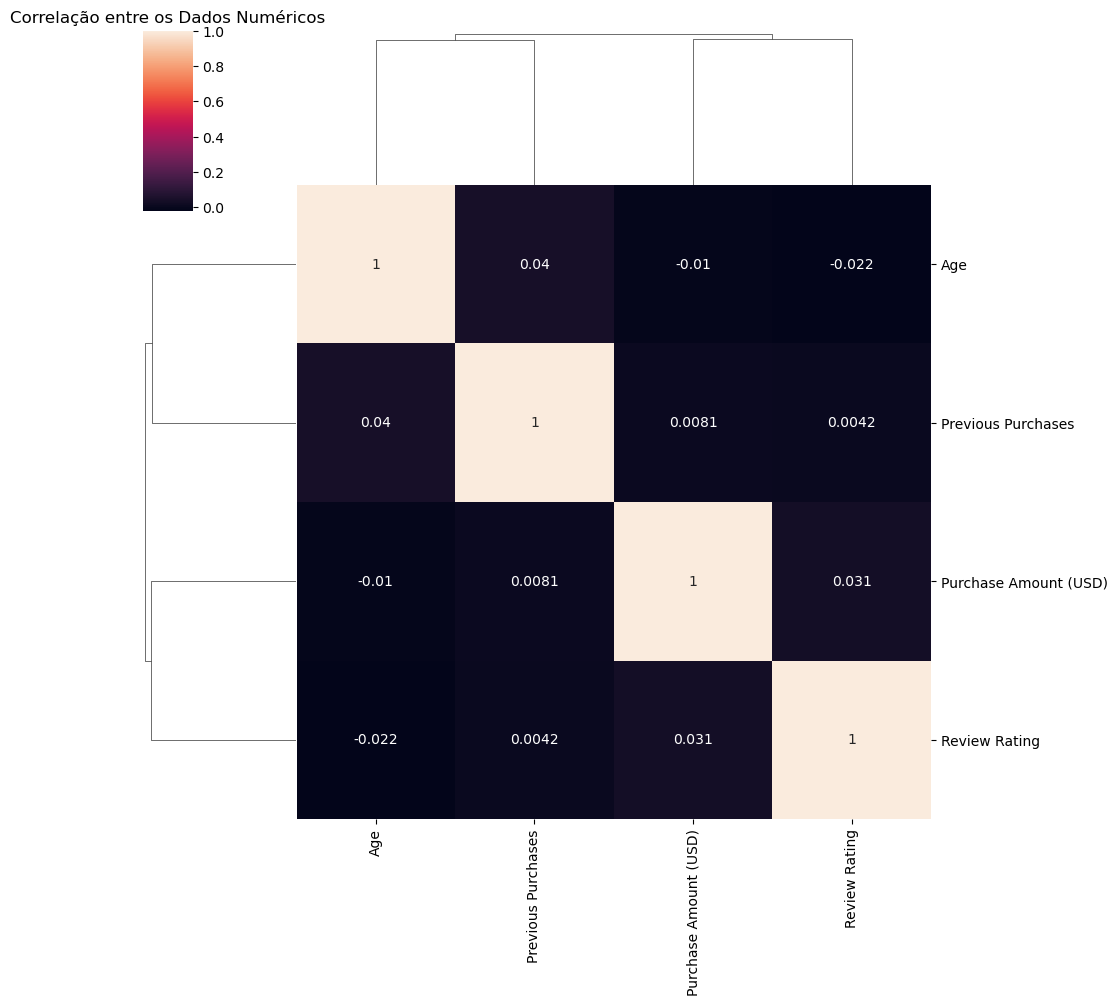

In [8]:
corr_matrix = numeric_cols.corr()

sns.clustermap(corr_matrix, annot = True)
plt.title("Correlação entre os Dados Numéricos")
plt.show()

In [9]:
def visualizacao_outlier(df):
  num_cols = len(df.columns)
  fig, axes = plt.subplots(1, num_cols, figsize=(3 * num_cols, 3))
  fig.suptitle("Boxplots das Características", fontsize=16)
  
  for i, col in enumerate(df.columns):
      sns.boxplot(x=df[col], ax=axes[i])
      axes[i].set_title(f'Boxplot de {col}')
    
  plt.tight_layout()
  plt.subplots_adjust(top=0.70)  # Deixe um espaço entre o título e os gráficos
  plt.show()

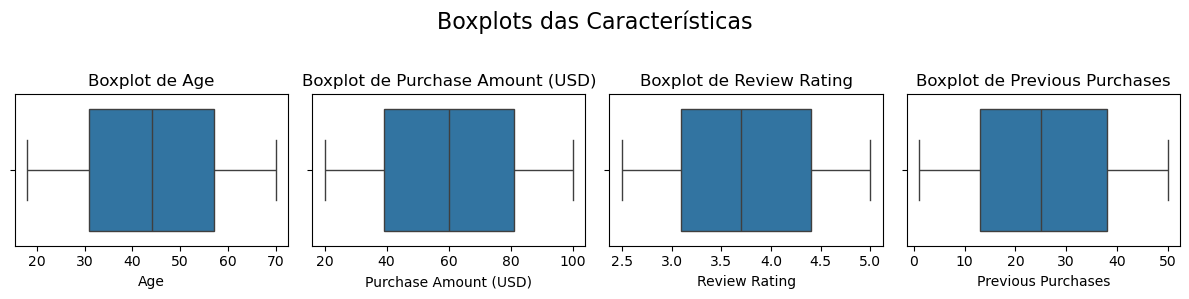

In [10]:
visualizacao_outlier(numeric_cols)

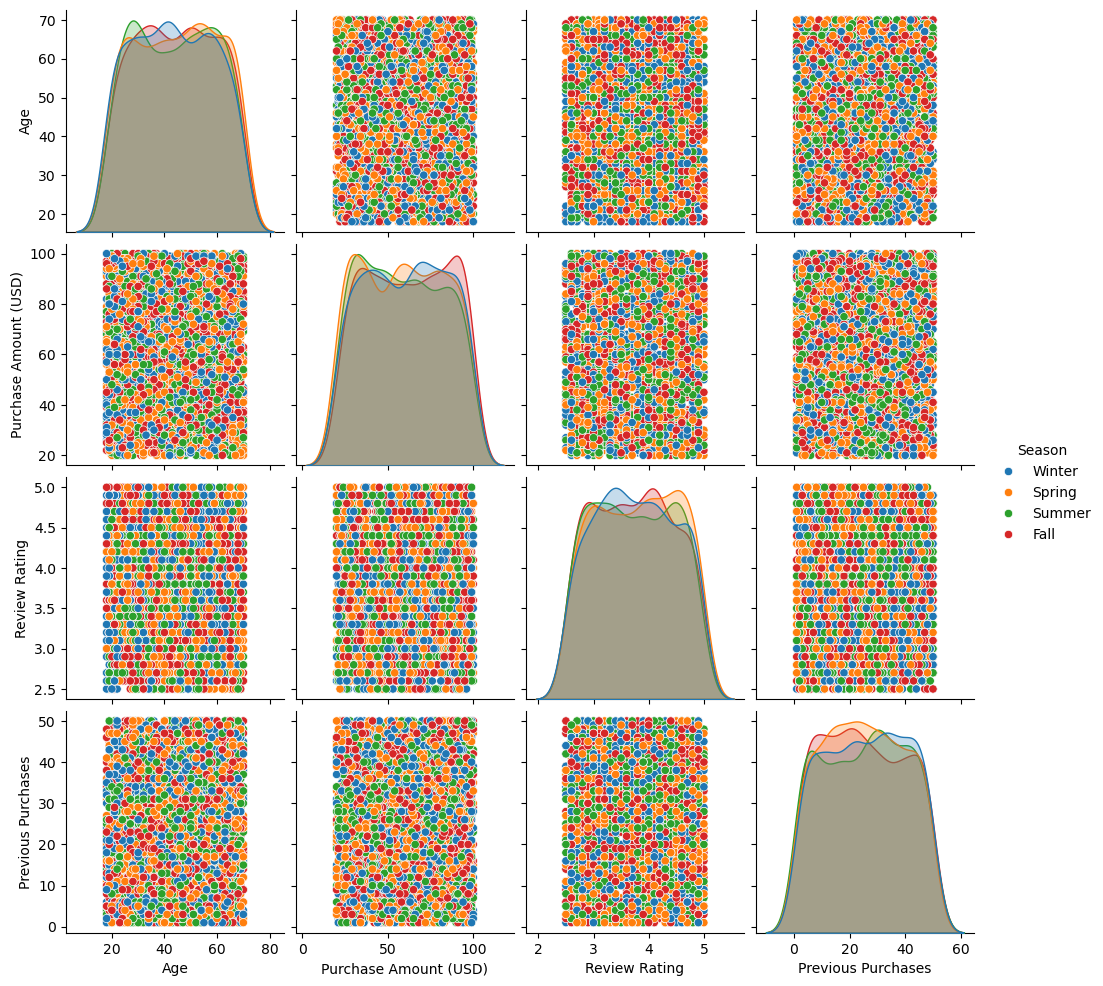

In [11]:
sns.pairplot(df, hue="Season")
plt.show()

## 🔎 Análise Exploratória de Dados(EDA)

In [12]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [ ]:
# 1.Segmentação de Clientes
# Segmentação com base em faixas etárias
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100],
                         labels=['Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso'])

# Número de registros (clientes) e gasto total por grupos de idade
age_group_summary = df.groupby('Age Group', observed=False).agg(
    Customer_Count=('Age', 'size'),  # Contagem de linhas (registros)
    Total_Spending=('Purchase Amount (USD)', 'sum')  # Soma do gasto total
)

print("Número de Clientes e Gastos Totais por Faixas Etárias:")
print(age_group_summary)


Número de Clientes e Gastos Totais por Faixas Etárias:
              Customer_Count  Total_Spending
Age Group                                   
Adolescente               69            4139
Jovem Adulto            1244           74833
Adulto                  1111           65629
Idoso                   1476           88480


Total de Vendas por Categoria:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


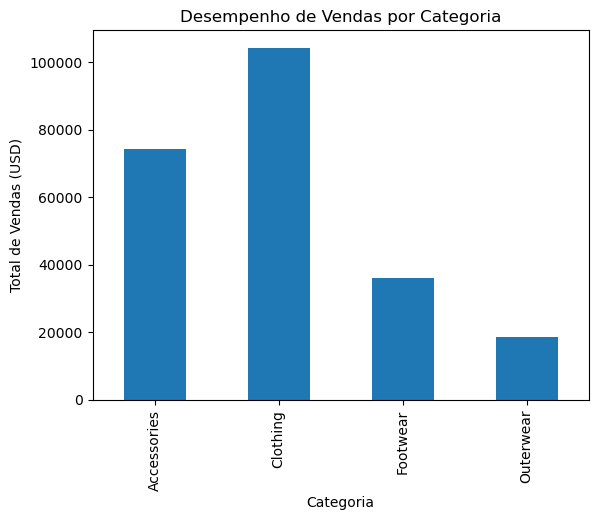

In [14]:
# 2. Desempenho de Vendas com Base em Categorias
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total de Vendas por Categoria:")
print(category_sales)

category_sales.plot(kind='bar', title='Desempenho de Vendas por Categoria',
                    xlabel='Categoria', ylabel='Total de Vendas (USD)')
plt.show()

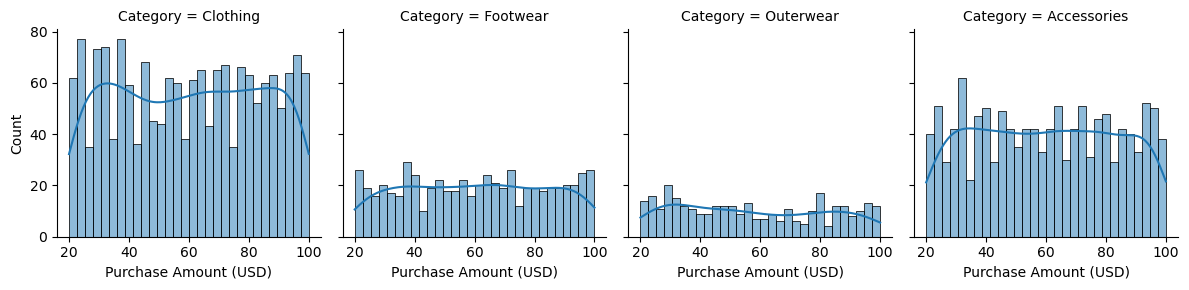

In [15]:
g = sns.FacetGrid(df, col = "Category")
g.map(sns.histplot, "Purchase Amount (USD)", bins = 30, kde = True)
plt.show()

Desempenho de Vendas por Estação:
Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


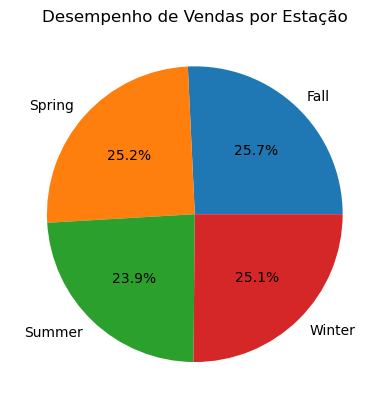

In [16]:
# 3. Desempenho com Base nas Estações
season_sales = df.groupby('Season')['Purchase Amount (USD)'].sum()
print("Desempenho de Vendas por Estação:")
print(season_sales)

season_sales.plot(kind='pie', autopct='%1.1f%%', title='Desempenho de Vendas por Estação')
plt.ylabel('')
plt.show()

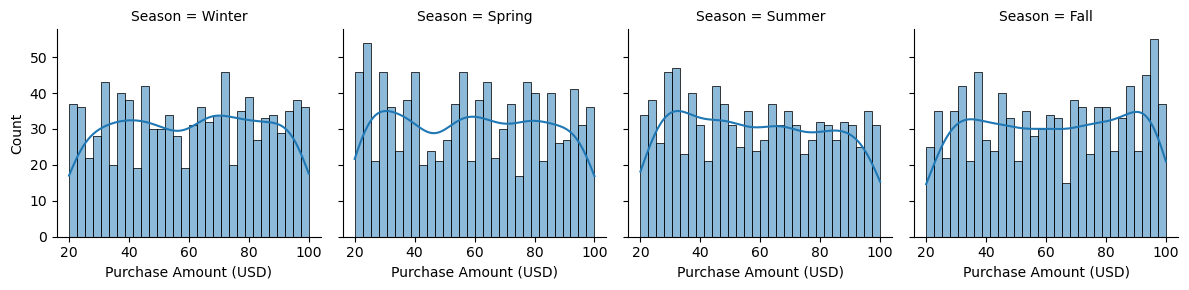

In [17]:
g = sns.FacetGrid(df, col = "Season")
g.map(sns.histplot, "Purchase Amount (USD)", bins = 30, kde = True)
plt.show()

Desempenho de Vendas com Base em Estação e Categoria:
Category  Accessories  Clothing  Footwear  Outerwear
Season                                              
Fall            19874     26220      8665       5259
Spring          17007     27692      9555       4425
Summer          19028     23078      9393       4278
Winter          18291     27274      8480       4562



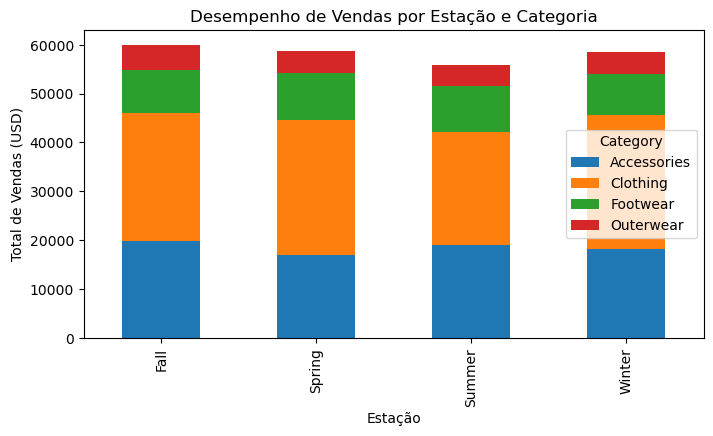

In [18]:
# 4. Interação entre Estação e Categoria
season_category = df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().unstack()
print("Desempenho de Vendas com Base em Estação e Categoria:")
print(season_category)
print("")

season_category.plot(figsize=(8, 4), kind='bar', stacked=True,
                     title='Desempenho de Vendas por Estação e Categoria',
                     xlabel='Estação', ylabel='Total de Vendas (USD)')
plt.show()


Distribuição de Clientes por Status de Assinatura:
Subscription Status
No     2847
Yes    1053
dtype: int64


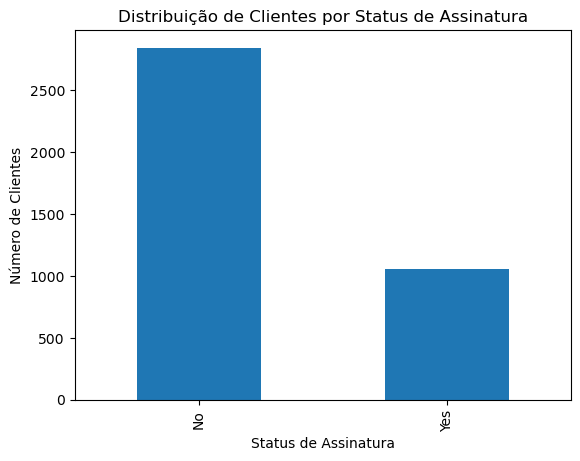

In [19]:
# 5. Fidelidade do Cliente
loyalty_analysis = df.groupby('Subscription Status').size()
print("Distribuição de Clientes por Status de Assinatura:")
print(loyalty_analysis)

loyalty_analysis.plot(kind='bar', title='Distribuição de Clientes por Status de Assinatura',
                      xlabel='Status de Assinatura', ylabel='Número de Clientes')
plt.show()

In [20]:
# 6. Análise de Descontos e Promoções
# Taxa de vendas com desconto aplicado
discount_rate = df['Discount Applied'].value_counts(normalize=True) * 100
print("Taxa de Vendas com Desconto Aplicado:")
print(discount_rate)
print("")

# Taxa de uso de código promocional
promo_usage = df['Promo Code Used'].value_counts(normalize=True) * 100
print("Taxa de Uso de Código Promocional:")
print(promo_usage)

Taxa de Vendas com Desconto Aplicado:
Discount Applied
No     57.0
Yes    43.0
Name: proportion, dtype: float64

Taxa de Uso de Código Promocional:
Promo Code Used
No     57.0
Yes    43.0
Name: proportion, dtype: float64


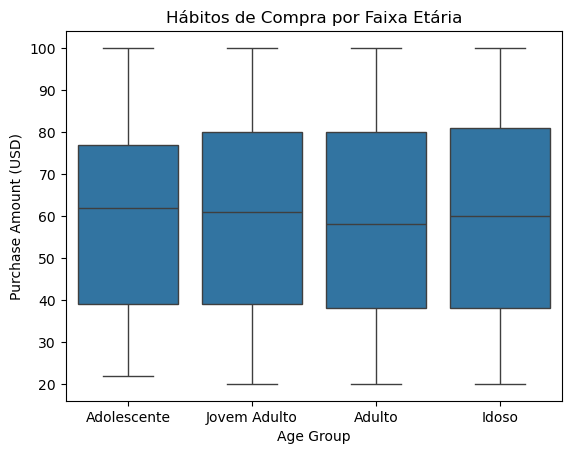

******************************************************************************************


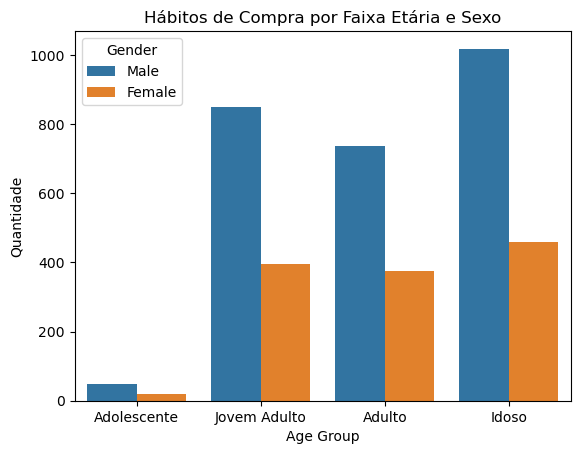

******************************************************************************************


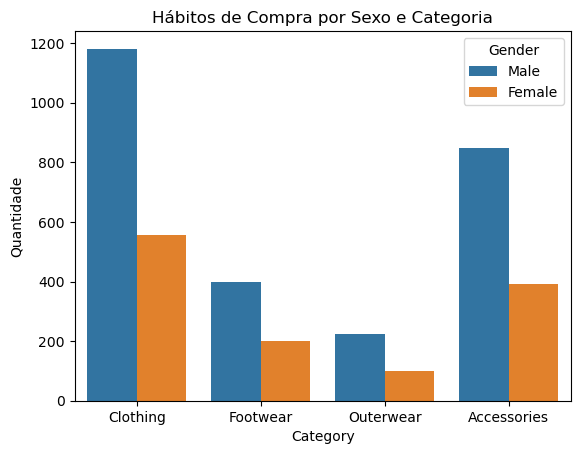

******************************************************************************************


In [21]:
# 7. Tendências Demográficas
# Idade e hábitos de compra
sns.boxplot(x='Age Group', y='Purchase Amount (USD)', data=df)
plt.title('Hábitos de Compra por Faixa Etária')
plt.show()
print("*" * 90)

# Idade e Sexo com base nos hábitos de compra
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title('Hábitos de Compra por Faixa Etária e Sexo')
plt.ylabel("Quantidade")
plt.show()
print("*" * 90)

# Sexo e Categoria com base nos hábitos de compra
sns.countplot(x='Category', hue='Gender', data=df)
plt.title('Hábitos de Compra por Sexo e Categoria')
plt.ylabel("Quantidade")
plt.show()
print("*" * 90)


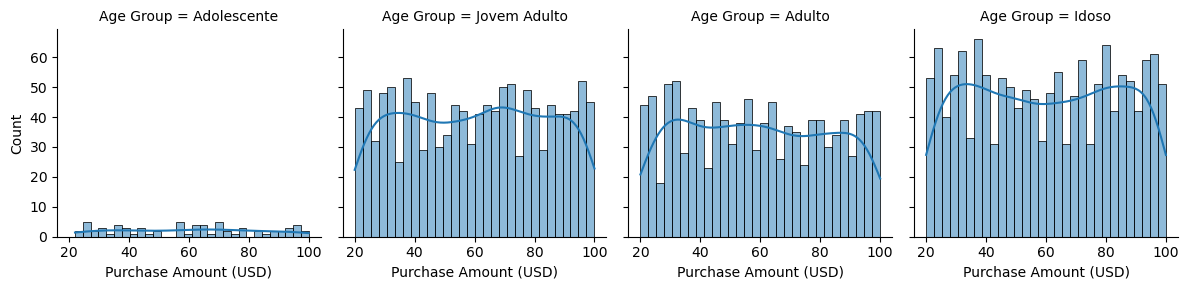

In [22]:
g = sns.FacetGrid(df, col = "Age Group")
g.map(sns.histplot, "Purchase Amount (USD)", bins = 30, kde = True)
plt.show()

Distribuição dos Métodos de Pagamento:
Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64


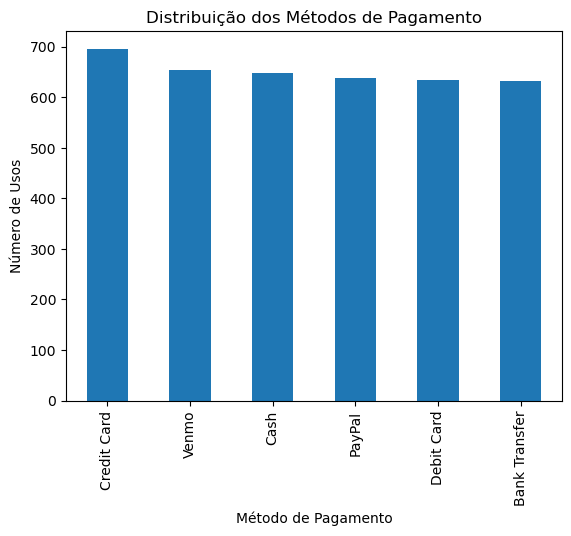

Distribuição dos Tipos de Entrega:
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


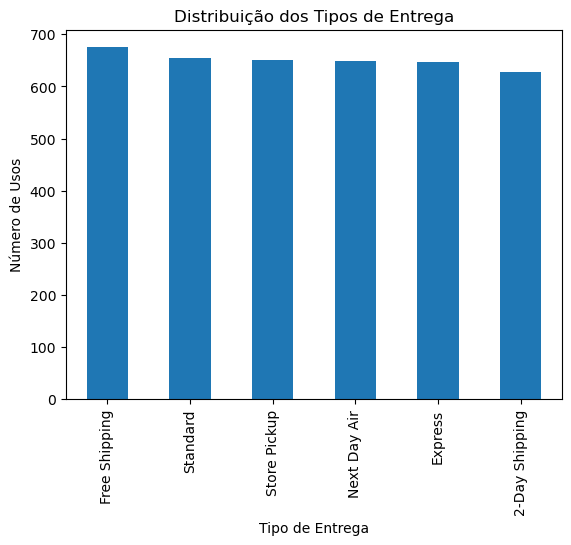

In [23]:
# 8. Análise de Pagamento e Entrega
# Popularidade dos métodos de pagamento
payment_methods = df['Payment Method'].value_counts()
print("Distribuição dos Métodos de Pagamento:")
print(payment_methods)

payment_methods.plot(kind='bar', title='Distribuição dos Métodos de Pagamento', 
                     xlabel='Método de Pagamento', ylabel='Número de Usos')
plt.show()

# Tipos de entrega
shipping_types = df['Shipping Type'].value_counts()
print("Distribuição dos Tipos de Entrega:")
print(shipping_types)

shipping_types.plot(kind='bar', title='Distribuição dos Tipos de Entrega',
                    xlabel='Tipo de Entrega', ylabel='Número de Usos')
plt.show()


In [24]:
# 9. Feedback dos Clientes
# Média da pontuação de avaliação
avg_rating = df['Review Rating'].mean()
print(f"Média da Pontuação de Avaliação: {avg_rating:.2f}")

# Produtos com baixa avaliação
low_rated = df[df['Review Rating'] < 3]
print("Produtos com Baixa Avaliação:")
print(low_rated[['Item Purchased', 'Review Rating']])

# Produtos com a maior avaliação
high_rated = df[df['Review Rating'] > 4]
print("Produtos com a Maior Avaliação:")
print(high_rated[['Item Purchased', 'Review Rating']])


Média da Pontuação de Avaliação: 3.75
Produtos com Baixa Avaliação:
     Item Purchased  Review Rating
4            Blouse            2.7
5          Sneakers            2.9
8              Coat            2.6
15            Skirt            2.8
20            Pants            2.8
...             ...            ...
3881          Scarf            2.8
3882          Pants            2.6
3887          Shirt            2.7
3890          Shirt            2.6
3897           Belt            2.9

[685 rows x 2 columns]
Produtos com a Maior Avaliação:
     Item Purchased  Review Rating
9           Handbag            4.8
10            Shoes            4.1
11           Shorts            4.9
12             Coat            4.5
13            Dress            4.7
...             ...            ...
3879          Skirt            4.1
3884        Sandals            4.9
3891          Dress            4.7
3895         Hoodie            4.2
3896       Backpack            4.5

[1463 rows x 2 columns]


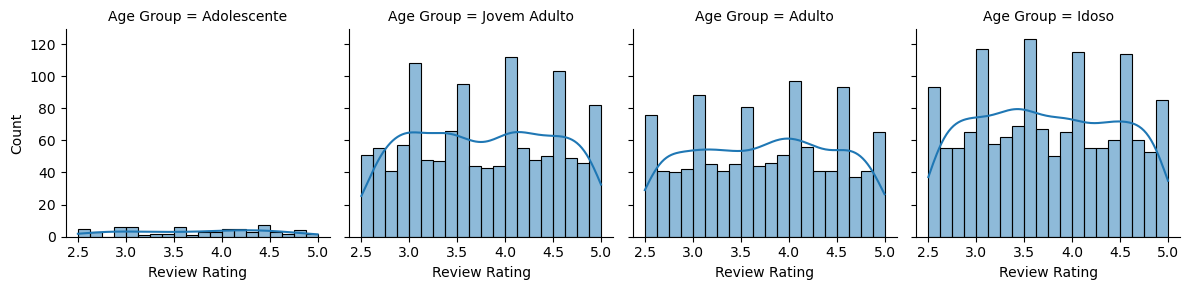

In [25]:
g = sns.FacetGrid(df, col = "Age Group")
g.map(sns.histplot, "Review Rating", bins = 20, kde = True)
plt.show()

Total de Vendas Anuais: $3900.00


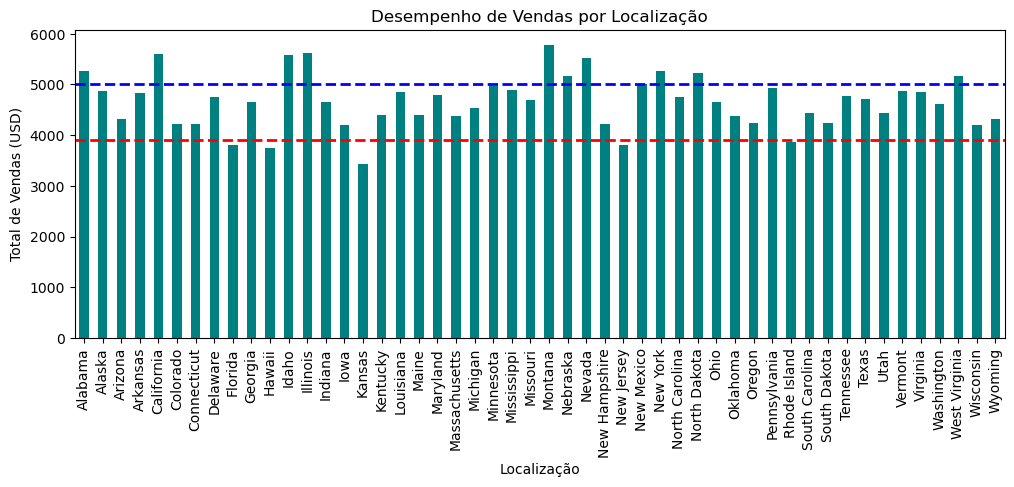

In [26]:
# 10. Análise de Vendas e Receita
# Total de vendas
avg_purchase = df['Purchase Amount (USD)'].count()
print(f"Total de Vendas Anuais: ${avg_purchase:.2f}")

# Desempenho de vendas por localização
location_sales = df.groupby('Location')['Purchase Amount (USD)'].sum()

location_sales.plot(figsize=(12,4), kind='bar', title='Desempenho de Vendas por Localização', 
                    xlabel='Localização', ylabel='Total de Vendas (USD)', color='teal')

plt.axhline(y=3900, color='red', linestyle='--', linewidth=2)

plt.axhline(y=5000, color='blue', linestyle='--', linewidth=2)

plt.show()

Distribuição da Frequência de Vendas:
Frequency of Purchases
Annually          572
Bi-Weekly         547
Every 3 Months    584
Fortnightly       542
Monthly           553
Quarterly         563
Weekly            539
dtype: int64


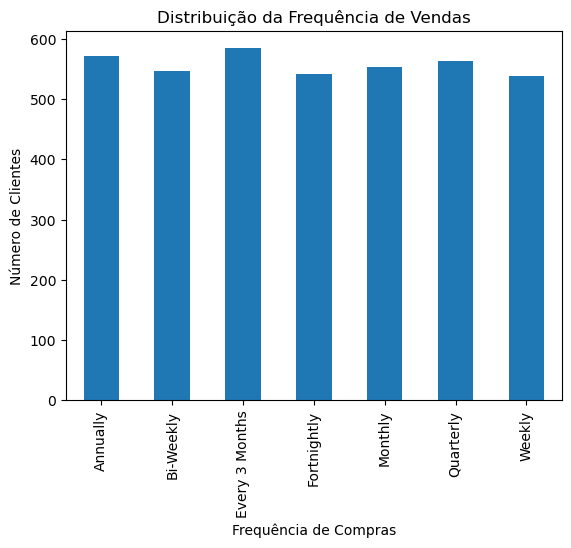

In [27]:
# 11. Análise de Frequência de Vendas
frequency_analysis = df.groupby('Frequency of Purchases').size()
print("Distribuição da Frequência de Vendas:")
print(frequency_analysis)
frequency_analysis.plot(kind='bar', title='Distribuição da Frequência de Vendas',
                        xlabel='Frequência de Compras', ylabel='Número de Clientes')
plt.show()


In [28]:
# 12. Efeito dos Descontos no Valor Médio de Vendas
avg_discounted = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_non_discounted = df[df['Discount Applied'] == 'No']['Purchase Amount (USD)'].mean()
print(f"Valor Médio de Vendas com Desconto: ${avg_discounted:.2f}")
print(f"Valor Médio de Vendas sem Desconto: ${avg_non_discounted:.2f}")

Valor Médio de Vendas com Desconto: $59.28
Valor Médio de Vendas sem Desconto: $60.13


Produtos mais vendidos:
Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64
----------------------------------------
Produtos menos vendidos:
Item Purchased
Sneakers    145
Boots       144
Backpack    143
Gloves      140
Jeans       124
Name: count, dtype: int64
----------------------------------------

Valor médio de vendas por categoria:
Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64
----------------------------------------


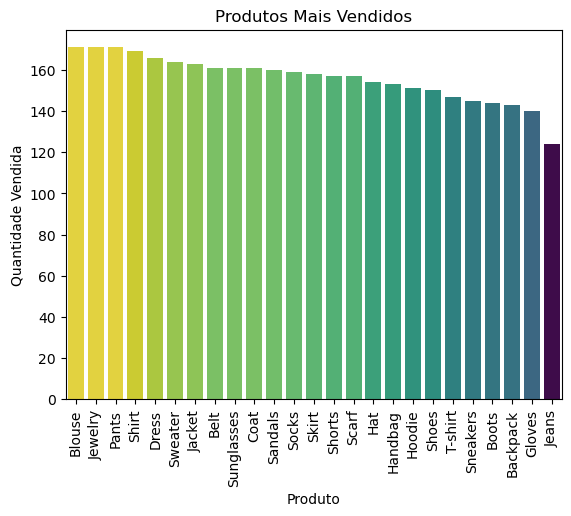

In [29]:
# 13. Análise de Diversificação de Produtos
# Produtos mais vendidos
top_items = df["Item Purchased"].value_counts()
print("Produtos mais vendidos:")
print(top_items.head())
print("-" * 40)
print("Produtos menos vendidos:")
print(top_items.tail())
print("-" * 40)

# Valor médio das vendas por categoria
top_categories = df.groupby("Category")["Purchase Amount (USD)"].mean()
print("\nValor médio de vendas por categoria:")
print(top_categories)
print("-" * 40)

# Visualização
sns.barplot(x=top_items.index, y=top_items.values,hue=top_items, legend=False, palette="viridis")
plt.title("Produtos Mais Vendidos")
plt.ylabel("Quantidade Vendida")
plt.xlabel("Produto")
plt.xticks(rotation=90)
plt.show()


Gastos Médios por Status de Assinatura:
Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64


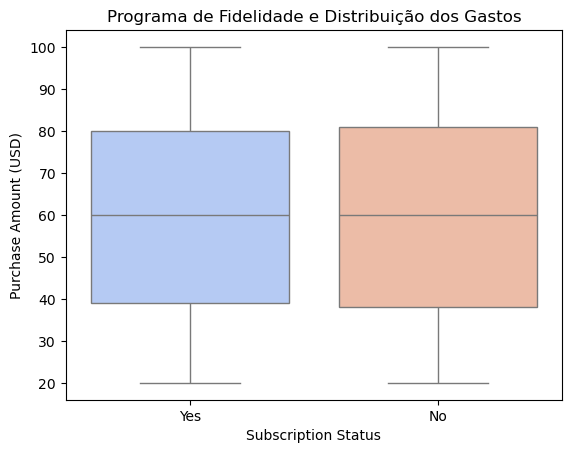

In [30]:
# 14. Performance do Programa de Fidelidade
subscription_analysis = df.groupby("Subscription Status")["Purchase Amount (USD)"].mean()
print("\nGastos Médios por Status de Assinatura:")
print(subscription_analysis)

# Visualização
sns.boxplot(data=df, x="Subscription Status", y="Purchase Amount (USD)", hue="Subscription Status", palette="coolwarm")
plt.title("Programa de Fidelidade e Distribuição dos Gastos")
plt.show()



Satisfação do Cliente por Tipo de Entrega:
Shipping Type
2-Day Shipping    3.761085
Express           3.776935
Free Shipping     3.717926
Next Day Air      3.720833
Standard          3.817737
Store Pickup      3.706462
Name: Review Rating, dtype: float64


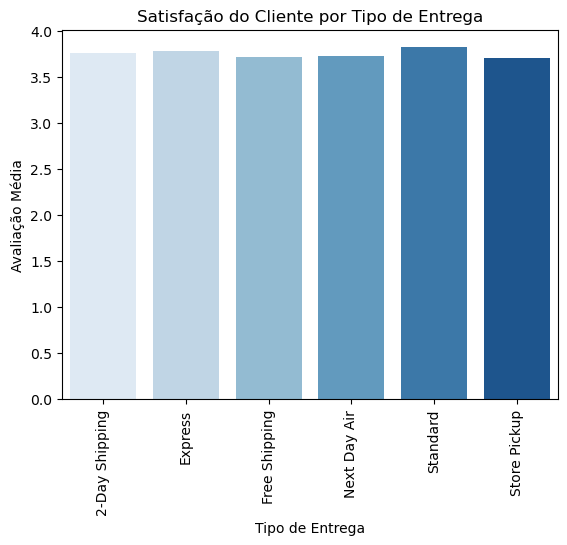

In [31]:
# 15. Tempo de Entrega e Satisfação do Cliente
shipping_analysis = df.groupby("Shipping Type")["Review Rating"].mean()
print("\nSatisfação do Cliente por Tipo de Entrega:")
print(shipping_analysis)

# Visualização
sns.barplot(x=shipping_analysis.index, y=shipping_analysis.values, hue=shipping_analysis.index, palette="Blues")
plt.title("Satisfação do Cliente por Tipo de Entrega")
plt.ylabel("Avaliação Média")
plt.xlabel("Tipo de Entrega")
plt.xticks(rotation = 90)
plt.show()